# Kaggle House Prices: Advanced Regression Techniques 주택 가격 예측

## 주어진 데이터를 이용해 어떤 변수가 주택 가격에 큰 영향을 미치는지 확인하고 상위권 점수에 도전해 보겠습니다.

### 라이브러리 셋팅

In [1]:
import pandas as pd  #pandas는 분석용 라이브러리입니다.
import seaborn as sns  #seaborn은 시각화 라이브러리입니다.
import numpy as np  #numpy는 고성능 수칙계산을 용이하게 하는 라이브러리입니다.
import matplotlib.pyplot as plt  #matplotlib.pyplot은 시각화 보조 라이브러리입니다. 현재 파이썬 파일에서 시각화 자료를 보여주도록 matplotlib inline도 추가하겠습니다.
%matplotlib inline  

### 데이터 로드

#### -훈련용 데이터 training data

In [2]:
train = pd.read_csv('train.csv')  #train이라는 변수에 csv파일을 읽는 코드인 pd.read_csv를 이용해 train.csv 파일을 불러옵니다.
print(train.shape)  #train.shape를 이용해 행과 열의 갯수를 파악합니다. train 데이터는 1460개의 행과 81개의 열로 이루어져 있습니다.
train.head()  #head()의 기능을 이용해 train데이터에서 가장 위에 있는 5개의 데이터를 불러옵니다.

(1460, 81)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


#### -테스트용 데이터 test data

In [3]:
test = pd.read_csv('test.csv')  #test라는 변수에 csv파일을 읽는 코드인 pd.read_csv를 이용해 test.csv 파일을 불러옵니다.
print(test.shape)  #test.shape를 이용해 행과 열의 갯수를 파악합니다. test 데이터는 1459개의 행과 80개의 열로 이루어져 있습니다.
test.head()  #head()의 기능을 이용해 test데이터에서 가장 위에 있는 5개의 데이터를 불러옵니다.

(1459, 80)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


### 컬럼(열) 설명

SalePrice = 주택 가격(단위: 달러), 목표 변수 \
MSSubClass = 주택 등급 \
MSZoning: 구역 분류 \
LotFrontage: 주택과 연결된 도로의 거리 \
LotArea: 주택과 연결된 도로 면적(단위: 제곱 피트) \
Street: 도로에 접근하는 방법 \
Alley: 골목에 접근하는 방법 \
LotShape: 주택의 형태 \
LandContour: 주택의 평평한 정도 \
Utilities: 이용가능한 공공서비스의 종류 \
LotConfig: 주택과 연결된 도로 형태 \
LandSlope: 주택의 경사 \
Neighborhood: Ames city 내 소재지 \
Condition1: 가까운 도로나 철도 \
Condition2: 가까운 도로나 철도 (두 곳이 존재할 경우) \
BldgType: 주거 형태 \
HouseStyle: 주거 스타일 \
OverallQual: 주택 전반의 재료와 마감 상태 \
OverallCond: 주택 전반의 상태 \
YearBuilt: 주택 건설 연도 \
YearRemodAdd: 리모델링 연도 \
RoofStyle: 지붕의 형태 \
RoofMatl: 지붕재 \
Exterior1st: 주택 외자재 \
Exterior2nd: 주택 외자재(한 종류 이상의 경우) \
MasVnrType: 벽돌 종류 \
MasVnrArea: 벽돌 면적(단위: 제곱 피트) \
ExterQual: 주택 외자재 퀄리티 \
ExterCond: 주택 외자재의 현재 상태 \
Foundation: 주택 구조물 종류 \
BsmtQual: 지하실 높이 \
BsmtCond: 지하실 상태 \
BsmtExposure: 지하실 바깥 벽면에 존재하는 것(예: 계단, 정원 등) \
BsmtFinType1: 지하실 마감 퀄리티 \
BsmtFinSF1: 1번 타입 마감 면적(단위: 제곱 피트) \
BsmtFinType2: 두번째 지하실 마감 퀄리티 (존재할 경우) \
BsmtFinSF2: 2번 타입 마감 면적(단위: 제곱 피트) \
BsmtUnfSF: 마감되지 않은 지하실 면적(단위: 제곱 피트) \
TotalBsmtSF: 지하실 총 면적(단위: 제곱 피트) \
Heating: 난방 형태 \
HeatingQC: 난방 퀄리티와 상태 \
CentralAir: 중앙 에어컨 \
Electrical: 전기 시스템 \
1stFlrSF: 1층 면적(단위: 제곱 피트) \
2ndFlrSF: 2층 면적(단위: 제곱 피트) \
LowQualFinSF: 마감이 안된 면적(단위: 제곱 피트) \
GrLivArea: 지상 생활 면적(단위: 제곱 피트) \
BsmtFullBath: 지하에 위치한 큰 화장실 \
BsmtHalfBath: 지하에 위치한 작은 화장실 \
FullBath: 지상에 위치한 큰 화장실 \
HalfBath: 지상에 위치한 작은 화장실 \
Bedroom: 지상에 위치한 침실 갯수 \
Kitchen: 부엌 갯수 \
KitchenQual: 부엌 퀄리티 \
TotRmsAbvGrd: 지상에 위치한 방 갯수(화장실 제외) \
Functional: 주택 기능 등급 \
Fireplaces: 난로 갯수 \
FireplaceQu: 난로 퀄리티 \
GarageType: 차고 위치 \
GarageYrBlt: 차고 생성 연도 \
GarageFinish: 차고 실내 마감 상태 \
GarageCars: 차고 사이즈(단위: 대) \
GarageArea: 차고 사이즈(단위: 제곱 피트) \
GarageQual: 차고 퀄리티 \
GarageCond: 차고 상태 \
PavedDrive: 포장도로 여부 \
WoodDeckSF: 우드 데크 면적(단위: 제곱 피트) \
OpenPorchSF: 개방형 현관(단위: 제곱 피트) \ 
EnclosedPorch: 폐쇄형 현관(단위: 제곱 피트) \
3SsnPorch: 삼면형 현관(단위: 제곱 피트) \
ScreenPorch: 스크린형 현관(단위: 제곱 피트) \
PoolArea: 수영장 면적(단위: 제곱 피트) \
PoolQC: 수영장 퀄리티 \
Fence: 울타리 퀄리티 \
MiscFeature: 다른 카테고리에 속하지 않은 잡동사니 \
MiscVal: 잡동사니의 가치(단위: $) \
MoSold: 판매 월 \
YrSold: 판매 연도 \
SaleType: 판매 형태 \
SaleCondition: 판매 상태 

### 탐험적 데이터 분석

이번 주제 데이터를 보면 컬럼이 80개 이상인 것을 알 수 있습니다. 이렇게 분석할 컬럼이 많은 경우에는 일일이 다 분석하기 보다는 수치형과 문자형 데이터를 나눠서 분석하는 것이 효율적입니다. 따라서 데이터 유형을 두 가지로 나눠 분석을 해보도록 하겠습니다.

#### 수치형 데이터와 문자형 데이터 확인

select_dtypes의 include와 exclude의 기능을 이용해 수치형과 문자형 데이터로 나누도록 하겠습니다.

##### -수치형 데이터

In [4]:
train_num = train.select_dtypes(exclude = 'object')  #train 데이터 중 문자형 데이터를 제외해 숫자형 데이터만 따로 모아 train_num이라는 변수에 넣도록 하겠습니다.
print(train_num.shape)  #train_num이 1460개의 행과 38개의 열로 이루어진 것을 알 수 있습니다.
train_num.head()

(1460, 38)


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,250000


In [5]:
test_num = test.select_dtypes(exclude = 'object')  #test 데이터에도 적용하도록 하겠습니다.
print(test_num.shape)
test_num.head()

(1459, 37)


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,1461,20,80.0,11622,5,6,1961,1961,0.0,468.0,...,730.0,140,0,0,0,120,0,0,6,2010
1,1462,20,81.0,14267,6,6,1958,1958,108.0,923.0,...,312.0,393,36,0,0,0,0,12500,6,2010
2,1463,60,74.0,13830,5,5,1997,1998,0.0,791.0,...,482.0,212,34,0,0,0,0,0,3,2010
3,1464,60,78.0,9978,6,6,1998,1998,20.0,602.0,...,470.0,360,36,0,0,0,0,0,6,2010
4,1465,120,43.0,5005,8,5,1992,1992,0.0,263.0,...,506.0,0,82,0,0,144,0,0,1,2010


##### -문자형 데이터

In [6]:
train_obj = train.select_dtypes(include = 'object')  #train 데이터 중 문자형 데이터를 제외해 숫자형 데이터만 따로 모아 train_num이라는 변수에 넣도록 하겠습니다.
print(train_obj.shape)  #train_num이 1460개의 행과 43개의 열로 이루어진 것을 알 수 있습니다.
train_obj.head()

(1460, 43)


,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal


In [7]:
test_obj = test.select_dtypes(include = 'object')  #test 데이터에도 적용하도록 하겠습니다.
print(test_obj.shape)
test_obj.head()

(1459, 43)


,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RH,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,...,Attchd,Unf,TA,TA,Y,NaN,MnPrv,NaN,WD,Normal
1,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,NaN,NaN,Gar2,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,...,Attchd,Fin,TA,TA,Y,NaN,MnPrv,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,...,Attchd,Fin,TA,TA,Y,NaN,NaN,NaN,WD,Normal
4,RL,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal


나눈 결과 train의 수치형 데이터 컬럼은 38개, 문자형 데이터는 43개로 이루어져 있고 test의 수치형 데이터 컬럼은 37개, 문자형 데이터는 43개로 이루어진 것을 알 수 있습니다.

#### 목표 변수와 수치형 컬럼의 상관관계 확인

-수치형 데이터는 목표 변수와 상관관계를 확인할 수 있기 때문에 각각의 수치형 컬럼이 SalePrice와 어느정도의 상관관계가 있는지 알아보도록 하겠습니다.

In [8]:
corr = train_num.corr()  #수치형 데이터의 상관관계 데이터를 corr라는 변수에 담아주도록 하겠습니다.
corr = corr.sort_values(by = 'SalePrice', ascending = False)  #corr 데이터에 sort_values를 이용해 목표 변수와 상관관계가 높은 순으로 정렬하도록 하겠습니다.
corr['SalePrice']  #목표 변수와 각 컬럼의 상관관계를 출력해 확인해 보도록 하겠습니다.

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePr

확인 결과 OverallQual, GrlivArea, GarageCars, GarageArea, TotalBsmtSF, 1stFlrSF, FullBath, TotRmsAbvGrd, YearBuilt, YearRemodAdd가 SalePrice와 밀접한 관계가 있는 것을 알 수 있습니다.

#### 목표 변수와 상관관계가 높은 컬럼들의 성향 파악

SalePrice와의 상관관계가 높은 컬럼들의 전체 상관관계를 봐보도록 하겠습니다.

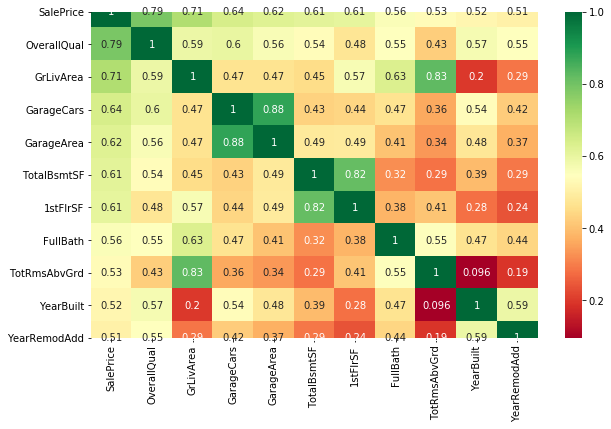

In [9]:
high_corr = corr.index[abs(corr['SalePrice']) > 0.5]  #SalePrice와 상관관계가 0.5 이상인 컬럼을 따로 high_corr라는 변수에 담아주도록 하겠습니다.
plt.figure(figsize = (10, 6))  #matplotlib을 이용해 그래프 사이즈를 보기 좋게 변경하도록 하겠습니다.
sns.heatmap(train_num[high_corr].corr(), annot = True, cmap="RdYlGn")  #히트맵에 각 컬럼끼리의 상관관계를 표시해 확인하도록 하겠습니다.

상관관계 히트맵을 분석한 결과 GarageArea와 GarageCars의 상관관계가 0.88, TotRmsAbvGrd와 GrLivArea의 상관관계가 0.83, TotalBsmtSF와 1stFlrSF의 상관관계가 0.82로 서로간의 상관관계가 상당히 높은 사실을 알 수 있습니다. 이렇게 목표 변수 외에 컬럼끼리 상관관계가 높으면 나중에 머신러닝 적용시 과적합 문제가 생기므로 SalePrice와 상관관계가 더 높은 쪽으로 선택해 머신러닝에 적용하도록 하겠습니다. 따라서 6개의 컬럼 중 SalePrice와 상관관계가 더 높은 GarageCars, GrLivArea, TotalBsmtSF를 사용하도록 하겠습니다.

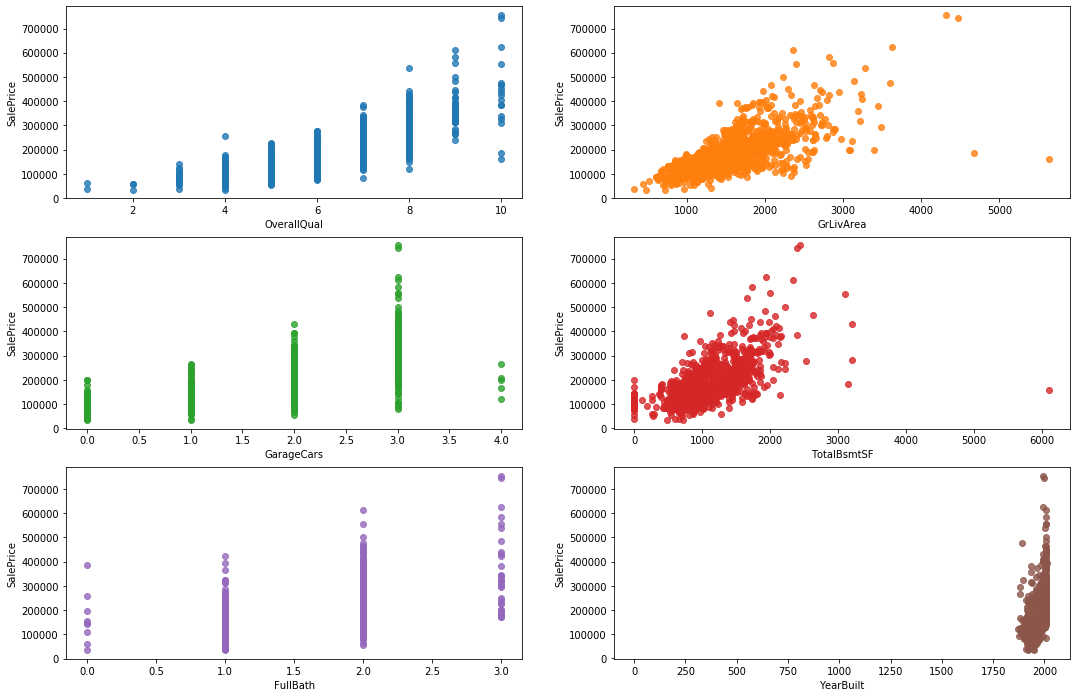

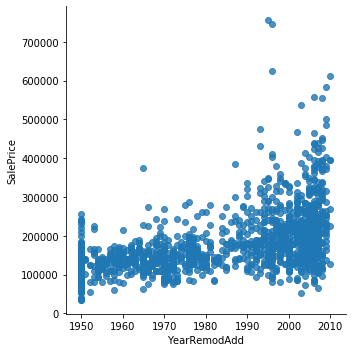

In [10]:
figure, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(nrows = 3, ncols = 2)  #matplotlib의 subplots를 이용해 3행 2열 6개의 그래프에 하나를 추가해 총 7개의 그래프를 출력하도록 하겠습니다.
figure.set_size_inches(18, 12)  #전체 그래프를 보기 쉽도록 크기를 조절하도록 하겠습니다.
sns.regplot(data = train, x = 'OverallQual', y = 'SalePrice', fit_reg = False, ax = ax1)  #seaborn의 regplot을 이용해 OverallQual과 SalePrice의 관계를 보도록 하겠습니다.
sns.regplot(data = train, x = 'GrLivArea', y = 'SalePrice', fit_reg = False, ax = ax2)  #seaborn의 regplot을 이용해 GrLivArea와 SalePrice의 관계를 보도록 하겠습니다.
sns.regplot(data = train, x = 'GarageCars', y = 'SalePrice', fit_reg = False, ax = ax3)  #seaborn의 regplot을 이용해 GarageCars와 SalePrice의 관계를 보도록 하겠습니다.
sns.regplot(data = train, x = 'TotalBsmtSF', y = 'SalePrice', fit_reg = False, ax = ax4)  #seaborn의 regplot을 이용해 TotalBsmtSF와 SalePrice의 관계를 보도록 하겠습니다.
sns.regplot(data = train, x = 'FullBath', y = 'SalePrice', fit_reg = False, ax = ax5)  #seaborn의 regplot을 이용해 FullBath와 SalePrice의 관계를 보도록 하겠습니다.
sns.regplot(data = train, x = 'YearBuilt', y = 'SalePrice', fit_reg = False, ax = ax6)  #seaborn의 regplot을 이용해 YearBuilt와 SalePrice의 관계를 보도록 하겠습니다.
sns.lmplot(data = train, x = 'YearRemodAdd', y = 'SalePrice', fit_reg = False)  #seaborn의 regplot을 이용해 YearRemodAdd와 SalePrice의 관계를 보도록 하겠습니다.

위의 그래프들을 보면 SalePrice와 높은 상관관계에 맞게 컬럼의 값이 높아질수록 SalePrice의 값도 일정하게 높아지는 것을 알 수 있습니다. \
첫 번째로 주택에 사용된 전반적인 원료나 마감 상태가 높을수록 주택 가격이 높은 것을 알 수 있습니다. \
두 번째로 몇몇의 이상치를 제외하고는 생활 면적이 넓을수록 주택 가격이 높은 것을 알 수 있습니다. \
세 번째로 주차 대수가 많을수록 주택 가격이 높은 것을 알 수 있습니다. \
네 번째로 몇몇의 이상치를 제외하고는 지하실의 총 면적이 넓을수록 주택 가격이 높은 것을 알 수 있습니다. \
다섯 번째로 큰 욕실의 갯수가 많을수록 주택 가격이 높은 것을 알 수 있습니다. \
여섯 번째로 최근에 리모델링을 했거나 건축되었을수록 주택 가격이 높은 것을 알 수 있습니다. \
그래프를 분석한 결과 7개의 컬럼이 일반적으로 생각했을 때 주택 가격에 충분히 영향을 미칠 수 있는 요소들인 것을 알 수 있습니다. \
또한, OverallQual, GarageCars, FullBath의 경우 범주형 데이터의 특성을 띄고 있으므로 전처리 과정에서 One-hot 인코딩을 진행하면 좋을 것 같습니다.

#### 수치형 데이터 각 컬럼의 값 확인

In [11]:
cols = train_num.columns
for i in cols:
    print(train_num[i].value_counts())
    print()

1460    1
479     1
481     1
482     1
483     1
       ..
976     1
977     1
978     1
979     1
1       1
Name: Id, Length: 1460, dtype: int64

20     536
60     299
50     144
120     87
30      69
160     63
70      60
80      58
90      52
190     30
85      20
75      16
45      12
180     10
40       4
Name: MSSubClass, dtype: int64

60.0     143
70.0      70
80.0      69
50.0      57
75.0      53
        ... 
106.0      1
38.0       1
138.0      1
140.0      1
137.0      1
Name: LotFrontage, Length: 110, dtype: int64

7200     25
9600     24
6000     17
10800    14
9000     14
         ..
7094      1
6130      1
9337      1
5232      1
8190      1
Name: LotArea, Length: 1073, dtype: int64

5     397
6     374
7     319
8     168
4     116
9      43
3      20
10     18
2       3
1       2
Name: OverallQual, dtype: int64

5    821
6    252
7    205
8     72
4     57
3     25
9     22
2      5
1      1
Name: OverallCond, dtype: int64

2006    67
2005    64
2004    54
2007    49


확인 결과 두 가지의 사실을 알 수 있을 것 같습니다. \
첫 번째는 LowQualFinSF, 3SsnPorch, PoolArea, MiscVal 컬럼의 경우 몇몇을 제외한 대부분의 값이 동일한 것을 알 수 있습니다. 이런 데이터의 경우 머신러닝에 적용해도 따로 분류할 정보가 없기 때문에 추후에 제거하는 편이 나을 것 같습니다. \
두 번째는 수치형 데이터임에도 앞서 언급한 OverallQual, FullBath 등과 같이 범주형 데이터의 특성을 띄고 있는 컬럼들이 존재한다는 것입니다. 따라서 전처리 과정에서 상관관계가 높은 컬럼은 One-hot 인코딩을 진행하면 좋을 것 같습니다.

-위의 사실들을 확인하기 위해 몇가지 컬럼을 시각화하도록 하겠습니다. 범주형 데이터의 특성을 띄는 컬럼을 오른쪽에 거의 하나의 값만 갖는 컬름을 왼쪽에 표시하도록 하겠습니다.

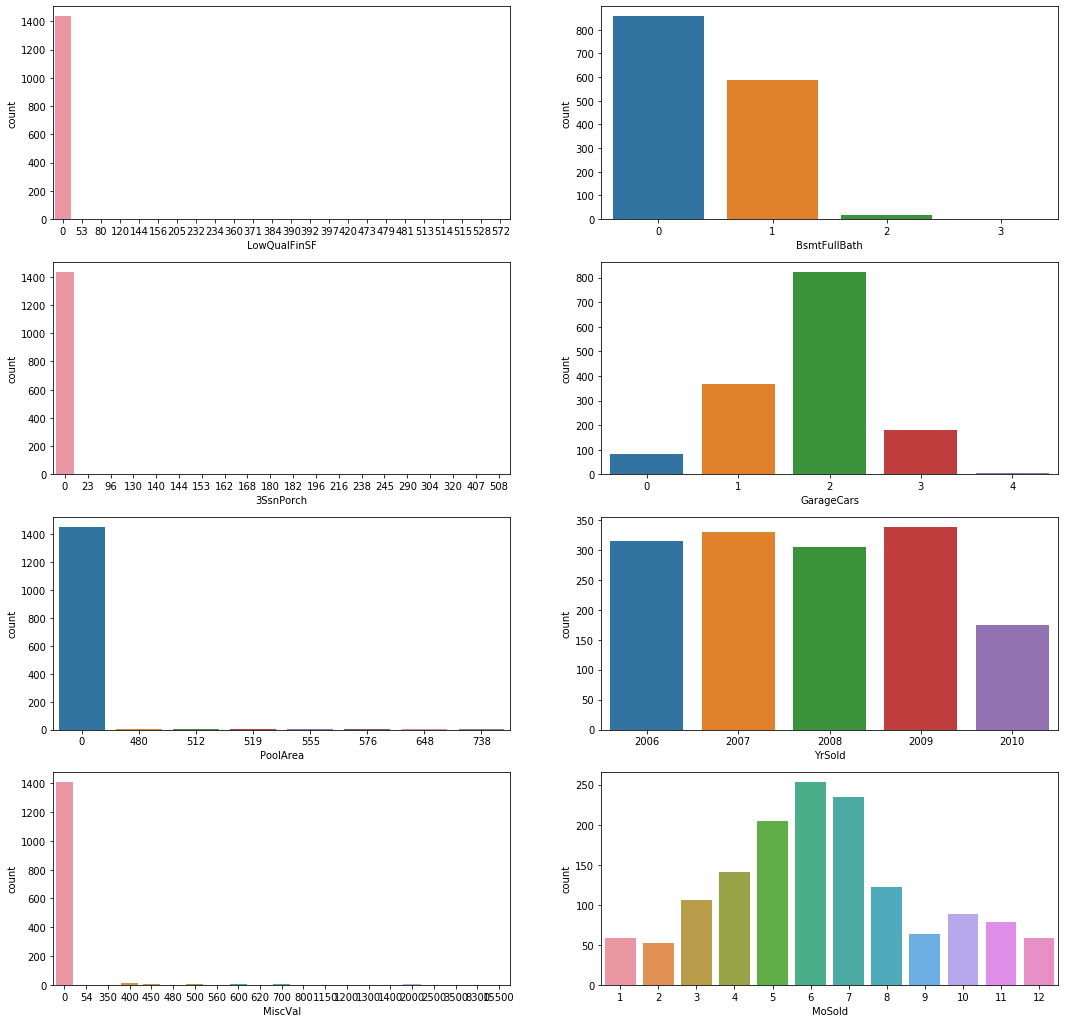

In [12]:
figure, ((ax1, ax2), (ax3, ax4), (ax5, ax6), (ax7, ax8)) = plt.subplots(nrows = 4, ncols = 2)  #matplotlib의 subplots를 이용해 4행 2열의 총 8개의 그래프를 출력하도록 하겠습니다.
figure.set_size_inches(18, 18)  #전체 그래프를 보기 쉽도록 크기를 조절하도록 하겠습니다.
sns.countplot(data = train, x = 'LowQualFinSF', ax = ax1)  #seaborn의 countplot을 이용해 LowQualFinSF 값의 분포 정도를 확인하도록 하겠습니다.
sns.countplot(data = train, x = 'BsmtFullBath', ax = ax2)  #seaborn의 countplot을 이용해 BsmtFullBath 값의 분포 정도를 확인하도록 하겠습니다.
sns.countplot(data = train, x = '3SsnPorch', ax = ax3)  #seaborn의 countplot을 이용해 3SsnPorch 값의 분포 정도를 확인하도록 하겠습니다.
sns.countplot(data = train, x = 'GarageCars', ax = ax4)  #seaborn의 countplot을 이용해 GarageCars 값의 분포 정도를 확인하도록 하겠습니다.
sns.countplot(data = train, x = 'PoolArea', ax = ax5)  #seaborn의 countplot을 이용해 PoolArea 값의 분포 정도를 확인하도록 하겠습니다.
sns.countplot(data = train, x = 'YrSold', ax = ax6)  #seaborn의 countplot을 이용해 YrSold 값의 분포 정도를 확인하도록 하겠습니다.
sns.countplot(data = train, x = 'MiscVal', ax = ax7)  #seaborn의 countplot을 이용해 MiscVal 값의 분포 정도를 확인하도록 하겠습니다.
sns.countplot(data = train, x = 'MoSold', ax = ax8)  #seaborn의 countplot을 이용해 MoSold 값의 분포 정도를 확인하도록 하겠습니다.

그래프를 보면 위에서 설명한 것처럼 왼쪽에 있는 컬럼들은 확연히 하나의 값에 몰려있어 분류에 도움이 되지 않을 것 같습니다. 오른쪽에 있는 컬럼들은 값이 많지 않아 범주형 데이터인 것을 확인할 수 있습니다.

#### 문자형 데이터 각 컬럼의 값 확인

-문자형 데이터의 경우 목표 변수와의 직접적인 상관관계를 확인할 수 없기 때문에 각 컬럼이 갖고 있는 값을 확인해 어떻게 활용할지 고민해 보도록 하겠습니다.

In [13]:
obj_columns = train_obj.columns  #문자형 데이터의 컬럼값을 따로 obj_columns라는 변수에 담아주도록 하겠습니다.
for i in obj_columns:  #for 반복문을 이용해 문자형 데이터 각 컬럼의 값을 확인해 보도록 하겠습니다.
    print(train_obj[i].value_counts())
    print()

RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64

Pave    1454
Grvl       6
Name: Street, dtype: int64

Grvl    50
Pave    41
Name: Alley, dtype: int64

Reg    925
IR1    484
IR2     41
IR3     10
Name: LotShape, dtype: int64

Lvl    1311
Bnk      63
HLS      50
Low      36
Name: LandContour, dtype: int64

AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64

Inside     1052
Corner      263
CulDSac      94
FR2          47
FR3           4
Name: LotConfig, dtype: int64

Gtl    1382
Mod      65
Sev      13
Name: LandSlope, dtype: int64

NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      37
ClearCr     28
SWISU       25
StoneBr     25
Blmngtn     17
MeadowV     17
BrDale      16
Veenker     11
NPkVill      9
Blueste      2
Name: Neighborhood

확인 결과 모든 데이터가 범주 형태인 것을 알 수 있습니다. 추가로 두 가지의 사실을 알 수 있습니다. \
첫 번째로 Utilities, Street, Condition2, RoofMatl, Heating 컬럼의 경우 몇몇을 제외한 대부분의 값이 동일한 것을 알 수 있습니다. 이런 데이터의 경우 머신러닝에 적용해도 따로 분류할 정보가 없기 때문에 추후에 제거하는 편이 나을 것 같습니다. \
두 번째로 PoolQC, Fence, MiscFeature과 같은 데이터는 총 데이터에 비해 값이 상당히 적음을 알 수 있습니다. 이는 결측값이 상당히 많기 때문인데 이럴경우 머신러닝에 적용해도 큰 효과가 없을 것 같으므로 결측값을 처리해 적용하는 편이 나을 것 같습니다.

-첫 번째 의문을 확인하기 위해 해당 컬럼과 다른 컬럼을 비교하도록 하겠습니다. 왼쪽에는 분류가 가능한 데이터 오른쪽에는 분류가 불가능한 데이터를 그래프로 출력하도록 하겠습니다.

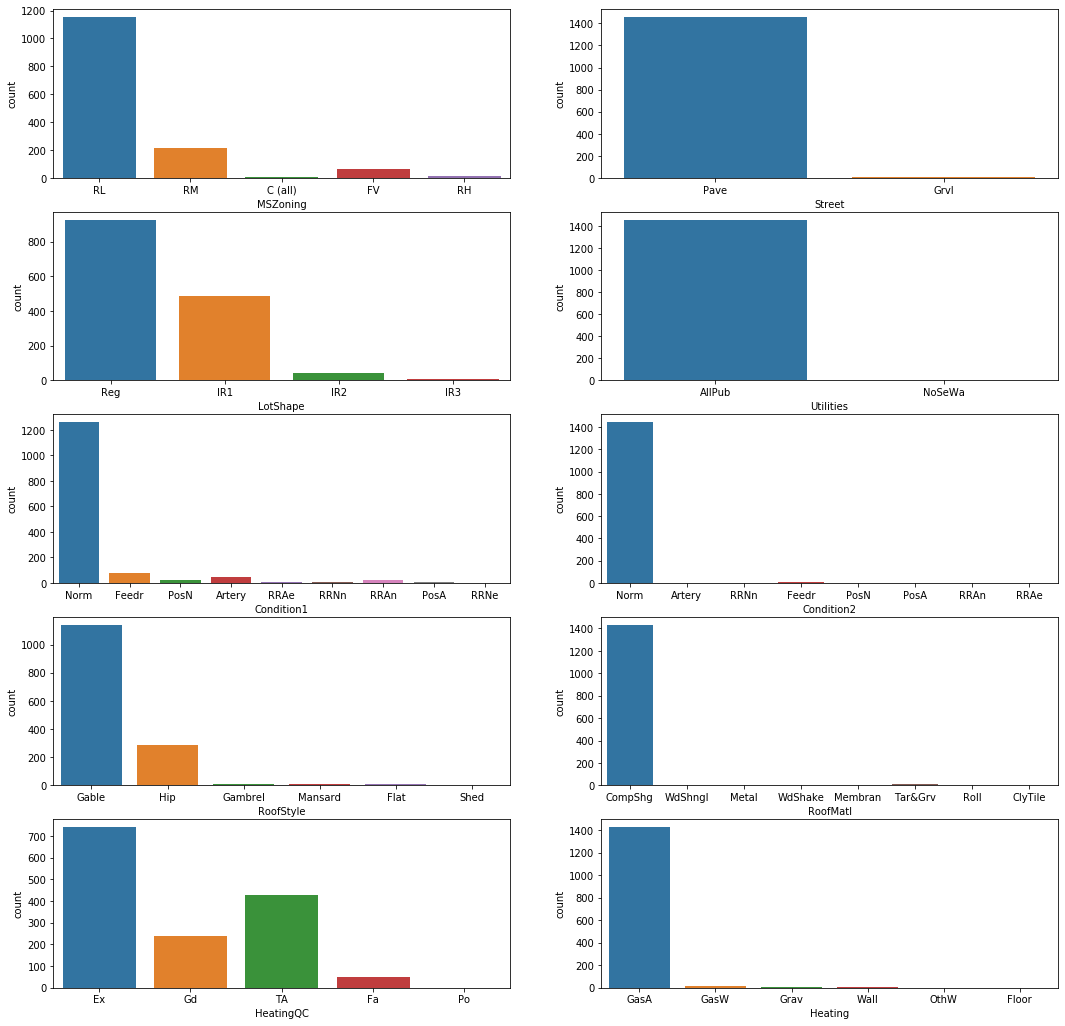

In [14]:
figure, ((ax1, ax2), (ax3, ax4), (ax5, ax6), (ax7, ax8), (ax9, ax10)) = plt.subplots(nrows = 5, ncols = 2)  #matplotlib의 subplots를 이용해 5행 2열의 총 10개의 그래프를 출력하도록 하겠습니다.
figure.set_size_inches(18, 18)  #전체 그래프를 보기 쉽도록 크기를 조절하도록 하겠습니다.
sns.countplot(data = train, x = 'MSZoning', ax = ax1)  #seaborn의 countplot을 이용해 MSZoning 값의 분포 정도를 확인하도록 하겠습니다.
sns.countplot(data = train, x = 'Street', ax = ax2)  #seaborn의 countplot을 이용해 Street 값의 분포 정도를 확인하도록 하겠습니다.
sns.countplot(data = train, x = 'LotShape', ax = ax3)  #seaborn의 countplot을 이용해 LotShape 값의 분포 정도를 확인하도록 하겠습니다.
sns.countplot(data = train, x = 'Utilities', ax = ax4)  #seaborn의 countplot을 이용해 Utilities 값의 분포 정도를 확인하도록 하겠습니다.
sns.countplot(data = train, x = 'Condition1', ax = ax5)  #seaborn의 countplot을 이용해 Condition1 값의 분포 정도를 확인하도록 하겠습니다.
sns.countplot(data = train, x = 'Condition2', ax = ax6)  #seaborn의 countplot을 이용해 Condition2 값의 분포 정도를 확인하도록 하겠습니다.
sns.countplot(data = train, x = 'RoofStyle', ax = ax7)  #seaborn의 countplot을 이용해 RoofStyle 값의 분포 정도를 확인하도록 하겠습니다.
sns.countplot(data = train, x = 'RoofMatl', ax = ax8)  #seaborn의 countplot을 이용해 RoofMatl 값의 분포 정도를 확인하도록 하겠습니다.
sns.countplot(data = train, x = 'HeatingQC', ax = ax9)  #seaborn의 countplot을 이용해 HeatingQC 값의 분포 정도를 확인하도록 하겠습니다.
sns.countplot(data = train, x = 'Heating', ax = ax10)  #seaborn의 countplot을 이용해 Heating 값의 분포 정도를 확인하도록 하겠습니다.

그래프를 분석한 결과 값이 어느정도 나누어져 있는 왼쪽에 비해 오른쪽에 있는 그래프가 확연하게 값이 하나에 몰려있는 것을 확인할 수 있습니다.

-두 번째 의문을 확인하기 위해 문자형 데이터의 결측값을 확인하고 추가로 수치형 데이터의 결측값도 확인하도록 하겠습니다.

In [15]:
train_obj.isnull().sum()  #문자형 데이터를 isnull로 결측값 여부를 확인하고 sum까지 활용해 각 컬럼 당 총 결측값 수를 확인하도록 하겠습니다.

MSZoning            0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinType2       38
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
KitchenQual         0
Functional          0
FireplaceQu       690
GarageType         81
GarageFinish       81
GarageQual         81
GarageCond         81
PavedDrive          0
PoolQC           1453
Fence            1179
MiscFeature      1406
SaleType            0
SaleCondition       0
dtype: int64

확인 결과 Alley, PoolQC, Fence, MiscFeature, FireplaceQu의 경우 결측값이 상당히 많고 그 외 결측값이 존재하는 컬럼이 다수 있는 것을 알 수 있습니다. 결측값이 존재하는 상태에서는 머신러닝 적용이 어렵기도 하지만 보다 유의미한 결과를 얻지 못할 수도 있기 때문에 전처리 과정에서 각 컬럼의 가장 많은 값인 최빈값으로 결측값을 대신하도록 하겠습니다.

In [16]:
train_num.isnull().sum()  #수치형 데이터를 isnull로 결측값 여부를 확인하고 sum까지 활용해 각 컬럼 당 총 결측값 수를 확인하도록 하겠습니다.

Id                 0
MSSubClass         0
LotFrontage      259
LotArea            0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
MasVnrArea         8
BsmtFinSF1         0
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       0
BsmtHalfBath       0
FullBath           0
HalfBath           0
BedroomAbvGr       0
KitchenAbvGr       0
TotRmsAbvGrd       0
Fireplaces         0
GarageYrBlt       81
GarageCars         0
GarageArea         0
WoodDeckSF         0
OpenPorchSF        0
EnclosedPorch      0
3SsnPorch          0
ScreenPorch        0
PoolArea           0
MiscVal            0
MoSold             0
YrSold             0
SalePrice          0
dtype: int64

분석 결과 LotFrontage, GarageYrBlt에만 결측값이 있는 것을 확인할 수 있습니다. 이 결측값은 전처리 과정에서 채워주면 될 것 같습니다.

#### 새로운 컬럼 추가

컬럼들을 보면 서로 다른 컬럼 값을 합치거나 하나의 컬럼을 변형해 유의미한 컬럼을 만들 수 있을 것 같습니다. 예를 들면 수영장 면적을 이용해 수영장의 존재 여부를 알 수 있는 컬럼을 만들 수 있을 것 같습니다.

먼저, 총 지하실 면적인 TotalBsmtSF와 1층 면적인 1stFlrSF 그리고 2층 면적인 2ndFlrSF를 합쳐 주택의 총 생활 면적을 구할 수 있을 것 같습니다. \
두 번째로 지하실 큰 화장실인 BsmtFullBath와 작은 화장실인 BsmtHalfBath 그리고 지상 큰 화장실인 FullBath와 작은 화장실인 HalfBath를 합쳐 총 화장실 갯수를 구할 수 있을 것 같습니다. \
세 번째로 OpenProchSF, EnclosedPorch, 3SsnPorch, ScreenPorch, WoodDeckSF를 합쳐 주 생활 공간외의 총 면적을 구할 수 있을 것 같습니다. \
네 번째로 수영장 면적인 PoolArea에서 0 보다 큰 면적을 가지고 있으면 수영장이 존재한다는 의미로 수영장 존재 여부 컬럼을 만들 수 있을 것 같습니다. \
다섯 번째로 2층 면적인 2ndFlrSF에서 0 보다 큰 면적을 가지고 있으면 2층이 존재한다는 의미로 2층 존재 여부 컬럼을 만들 수 있을 것 같습니다. \
여섯 번째로 차고 면적인 GarageArea에서 0 보다 큰 면적을 가지고 있으면 차고가 존재한다는 의미로 차고 존재 여부 컬럼을 만들 수 있을 것 같습니다. \
일곱 번째로 난로 갯수인 Fireplaces에서 0 보다 큰 값을 가지고 있으면 난로가 존재한다는 의미로 난로 존재 여부 컬럼을 만들 수 있을 것 같습니다. \
마지막으로 총 지하실 면적인 TotalBsmtSF에서 0 보다 큰 면적을 가지고 있으면 지하가 존재한다는 의미로 지하 존재 여부 컬럼을 만들 수 있을 것 같습니다. 

그럼 새로운 컬럼을 추가하도록 하겠습니다.

In [17]:
train_num['TotalSF'] = train_num['TotalBsmtSF'] + train_num['1stFlrSF'] + train_num['2ndFlrSF']  #첫 번째로 TotalSF라는 총 면적 컬럼을 만들도록 하겠습니다.
train_num['Total_Bath'] = (train_num['BsmtFullBath'] + (train_num['BsmtHalfBath'] * 0.5) + train_num['FullBath'] + (train_num['HalfBath'] * 0.5))  
#두 번째로 Total_Bath라는 총 화장실 갯수 컬럼을 만들도록 하겠습니다. 작은 화장실은 크기가 작으므로 반쪽을 의미하는 0.5를 곱해 계산하도록 하겠습니다.
train_num['Total_Porch'] = train_num['OpenPorchSF'] + train_num['EnclosedPorch'] + train_num['3SsnPorch'] + train_num['ScreenPorch'] + train_num['WoodDeckSF']  #세 번째로 Total_Porch라는 총 Porch 면적 컬럼을 만들도록 하겠습니다.
train_num['haspool'] = train_num['PoolArea'].apply(lambda x: 1 if x > 0 else 0)  #네 번째로 수영장 면적에 lambda 함수를 적용해 0을 넘으면 1 아니면 0을 출력하도록 하겠습니다.
train_num['has2ndfloor'] = train_num['2ndFlrSF'].apply(lambda x: 1 if x > 0 else 0)  #다섯 번째로 2층 면적에 lambda 함수를 적용해 0을 넘으면 1 아니면 0을 출력하도록 하겠습니다.
train_num['hasgarage'] = train_num['GarageArea'].apply(lambda x: 1 if x > 0 else 0)  #여섯 번째로 차고 면적에 lambda 함수를 적용해 0을 넘으면 1 아니면 0을 출력하도록 하겠습니다.
train_num['hasfireplace'] = train_num['Fireplaces'].apply(lambda x: 1 if x > 0 else 0)  #일곱 번째로 난로 갯수에 lambda 함수를 적용해 0을 넘으면 1 아니면 0을 출력하도록 하겠습니다.
train_num['hasBsmt'] = train_num['TotalBsmtSF'].apply(lambda x: 1 if x > 0 else 0)  #마지막으로 총 지하 면적에 lambda 함수를 적용해 0을 넘으면 1 아니면 0을 출력하도록 하겠습니다.

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the 

In [18]:
test_num['TotalSF'] = test_num['TotalBsmtSF'] + test_num['1stFlrSF'] + test_num['2ndFlrSF']  #test 데이터에도 적용하도록 하겠습니다.
test_num['Total_Bath'] = (test_num['BsmtFullBath'] + (test_num['BsmtHalfBath'] * 0.5) + test_num['FullBath'] + (test_num['HalfBath'] * 0.5))
test_num['Total_Porch'] = test_num['OpenPorchSF'] + test_num['EnclosedPorch'] + test_num['3SsnPorch'] + test_num['ScreenPorch'] + test_num['WoodDeckSF']
test_num['haspool'] = test_num['PoolArea'].apply(lambda x: 1 if x > 0 else 0)
test_num['has2ndfloor'] = test_num['2ndFlrSF'].apply(lambda x: 1 if x > 0 else 0)
test_num['hasgarage'] = test_num['GarageArea'].apply(lambda x: 1 if x > 0 else 0)
test_num['hasfireplace'] = test_num['Fireplaces'].apply(lambda x: 1 if x > 0 else 0)
test_num['hasBsmt'] = test_num['TotalBsmtSF'].apply(lambda x: 1 if x > 0 else 0)

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the 

새로 추가한 컬럼과 목표 변수인 SalePrice와의 상관관계를 보도록 하겠습니다.

In [19]:
train_num[['SalePrice', 'TotalSF', 'Total_Bath', 'Total_Porch', 'haspool', 'has2ndfloor', 'hasgarage', 'hasfireplace', 'hasBsmt']].corr()

,SalePrice,TotalSF,Total_Bath,Total_Porch,haspool,has2ndfloor,hasgarage,hasfireplace,hasBsmt
SalePrice,1.000000,0.782260,0.631731,0.390993,0.093708,0.137656,0.236832,0.471908,0.152829
TotalSF,0.782260,1.000000,0.604324,0.397428,0.197624,0.164012,0.190635,0.451986,0.251102
Total_Bath,0.631731,0.604324,1.000000,0.313911,0.101358,0.243200,0.145045,0.332572,0.120967
Total_Porch,0.390993,0.397428,0.313911,1.000000,0.120029,0.122123,0.105346,0.294594,0.120477
haspool,0.093708,0.197624,0.101358,0.120029,1.000000,0.039525,0.016822,0.065705,0.011192
has2ndfloor,0.137656,0.164012,0.243200,0.122123,0.039525,1.000000,0.036285,0.133521,0.052706
hasgarage,0.236832,0.190635,0.145045,0.105346,0.016822,0.036285,1.000000,0.202086,0.094187
hasfireplace,0.471908,0.451986,0.332572,0.294594,0.065705,0.133521,0.202086,1.000000,0.091777
hasBsmt,0.152829,0.251102,0.120967,0.120477,0.011192,0.052706,0.094187,0.091777,1.000000


수영장 존재 여부를 의미하는 haspool컬럼은 상관관계가 10% 미만으로 사실상 무의미하고 나머지는 유의미해 haspool을 제외하고 사용하도록 하겠습니다. 이 가운데 특히 상관관계가 높은 TotalSF와 Total_Bath를 시각화해 살펴보도록 하겠습니다.

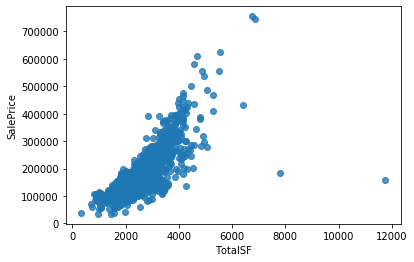

In [20]:
sns.regplot(data = train_num, x = 'TotalSF', y = 'SalePrice', fit_reg = False)  #seaborn의 regplot을 이용해 TotalSF와 SalePrice의 관계를 보도록 하겠습니다.

몇몇의 이상치를 제외하고 그래프를 보면 상관관계가 높은만큼 가파른 선형관계를 보이고 있습니다. 총 면적이 클수록 주택 가격이 높은 것을 알 수 있습니다.

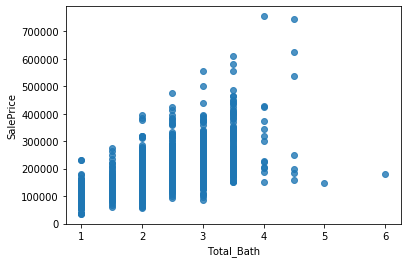

In [21]:
sns.regplot(data = train_num, x = 'Total_Bath', y = 'SalePrice', fit_reg = False)  #seaborn의 regplot을 이용해 Total_Bath와 SalePrice의 관계를 보도록 하겠습니다.

그래프를 보면 데이터수가 적은 4 이상을 제외하고는 화장실 갯수에 따라 주택 가격이 높은 것을 알 수 있습니다. 또한, Total_Bath가 범주 형태이므로 전처리 과정에서 One-hot 인코딩을 진행하도록 하겠습니다.

### 데이터 전처리

#### 불필요 데이터 제거

탐험적 데이터 분석에서 확인한 불필요한 데이터를 제거하도록 하겠습니다.

In [22]:
train_num.drop(['GarageArea', 'TotRmsAbvGrd', '1stFlrSF', 'LowQualFinSF', '3SsnPorch', 'MiscVal', 'PoolArea', 'haspool'], axis = 1, inplace = True)

C:\Users\user\Anaconda3\lib\site-packages\pandas\core\frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [23]:
test_num.drop(['GarageArea', 'TotRmsAbvGrd', '1stFlrSF', 'LowQualFinSF', '3SsnPorch', 'MiscVal', 'PoolArea', 'haspool'], axis = 1, inplace = True)

In [24]:
train_obj.drop(['Utilities', 'Street', 'Condition2', 'RoofMatl', 'Heating'], axis = 1, inplace = True)

In [25]:
test_obj.drop(['Utilities', 'Street', 'Condition2', 'RoofMatl', 'Heating'], axis = 1, inplace = True)

#### 결측값 처리

탐험적 데이터 분석에서 확인한 수치형 데이터와 문자형 데이터의 결측값을 처리하도록 하겠습니다.

##### -수치형 데이터 결측값 처리

위에서 확인한 train_num의 LotFrontage, MasVnrArea, GarageYrBlt의 결측값을 각 컬럼의 중앙값으로 변환하도록 하겠습니다.

In [26]:
train_num['LotFrontage'] = train_num['LotFrontage'].fillna(train_num['LotFrontage'].median())
train_num['MasVnrArea'] = train_num['MasVnrArea'].fillna(train_num['MasVnrArea'].median())
train_num['GarageYrBlt'] = train_num['GarageYrBlt'].fillna(train_num['GarageYrBlt'].median())

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the 

test_num의 경우 결측값이 train_num 보다 많기 때문에 test_num 데이터 전체를 대상으로 각 컬럼의 중앙값으로 변환하도록 하겠습니다.

In [27]:
test_num = test_num.fillna(test_num.median())  

##### -문자형 데이터 결측값 처리

위에서 확인한 train_obj의 결측값을 각 컬럼에서 가장 많은 값인 최반값으로 변환하도록 하겠습니다.

In [28]:
cols = ['Alley', 'MasVnrType', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Electrical', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature']
cols  #문자형 데이터에서 결측값이 존재한 컬럼을 따로 cols라는 변수로 묶어주도록 하겠습니다.

['Alley',
 'MasVnrType',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature']

In [29]:
for col in cols:
    train_obj[col].fillna(train_obj[col].mode(), inplace = True)

C:\Users\user\Anaconda3\lib\site-packages\pandas\core\generic.py:6287: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


test_obj의 경우 결측값이 train_obj 보다 많기 때문에 전체를 한 번에 적용하도록 하겠습니다.

In [30]:
test_obj = test_obj.fillna(test_obj.mode())

#### 수치형 데이터 왜도 확인

수치형 데이터의 분포가 고르지 못한 컬럼은 분석에 용이하지 않기 때문에 로그값을 적용하도록 하겠습니다.

In [31]:
from scipy.stats import skew  #scipy의 stats에서 skew를 불러오도록 하겠습니다.
skewness = train_num.apply(lambda x: skew(x))  #수치형 데이터에 lambda 함수를 적용해 skewness라는 변수에 담아주도록 하겠습니다.
skewness.sort_values(ascending = False)  #왜도가 높은 순으로 나열해 수치형 데이터의 왜도를 확인해 보도록 하겠습니다.

LotArea          12.195142
KitchenAbvGr      4.483784
BsmtFinSF2        4.250888
ScreenPorch       4.117977
BsmtHalfBath      4.099186
EnclosedPorch     3.086696
MasVnrArea        2.674865
LotFrontage       2.406671
OpenPorchSF       2.361912
SalePrice         1.880941
TotalSF           1.774874
BsmtFinSF1        1.683771
WoodDeckSF        1.539792
TotalBsmtSF       1.522688
MSSubClass        1.406210
GrLivArea         1.365156
Total_Porch       1.101180
BsmtUnfSF         0.919323
2ndFlrSF          0.812194
OverallCond       0.692355
HalfBath          0.675203
Fireplaces        0.648898
BsmtFullBath      0.595454
has2ndfloor       0.273762
Total_Bath        0.264404
OverallQual       0.216721
MoSold            0.211835
BedroomAbvGr      0.211572
YrSold            0.096170
FullBath          0.036524
Id                0.000000
hasfireplace     -0.109754
GarageCars       -0.342197
YearRemodAdd     -0.503044
YearBuilt        -0.612831
GarageYrBlt      -0.677636
hasgarage        -3.883739
h

왜도가 절대값 기준 0.5 이상인 컬럼은 분포가 고르지 못하다고 판단해 분석에 용이하도록 로그값을 적용하도록 하겠습니다.

In [32]:
skewness_bad = skewness[(abs(skewness) > 0.5) | (abs(skewness) < -0.5)]  #왜도가 절대값 기준 0.5 이상인 컬럼을 skewness_bad라는 변수에 담아주도록 하겠습니다.
skewness_bad.index  #skewness_bad에 담긴 컬럼을 확인하도록 하겠습니다.

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath',
       'HalfBath', 'KitchenAbvGr', 'Fireplaces', 'GarageYrBlt', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', 'ScreenPorch', 'SalePrice', 'TotalSF',
       'Total_Porch', 'hasgarage', 'hasBsmt'],
      dtype='object')

In [33]:
skew_features = train_num[skewness_bad.index]  #분포가 나쁜 컬럼만 따로 모아 skew_features라는 데이터 프레임으로 만들도록 하겠습니다.
skew_features = np.log(skew_features + 1)  #skew_features 데이터에 로그값을 적용하도록 하겠습니다.

In [34]:
skewness_bad.index

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath',
       'HalfBath', 'KitchenAbvGr', 'Fireplaces', 'GarageYrBlt', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', 'ScreenPorch', 'SalePrice', 'TotalSF',
       'Total_Porch', 'hasgarage', 'hasBsmt'],
      dtype='object')

In [35]:
skew_features_test = test_num[['MSSubClass', 'LotFrontage', 'LotArea', 'OverallCond', 'YearBuilt',  #test 데이터에는 목표 변수인 SalePrice를 제외하고 적용하도록 하겠습니다.
       'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath',
       'HalfBath', 'KitchenAbvGr', 'Fireplaces', 'GarageYrBlt', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', 'ScreenPorch', 'TotalSF',
       'Total_Porch', 'hasgarage', 'hasBsmt']]
skew_features_test = np.log(skew_features_test + 1)

이제 skew_features에 분포가 비교적 고른 컬럼들을 추가하도록 하겠습니다. Id 컬럼은 단순히 행 수를 표시하는 컬럼이므로 사용하지 않도록 하겠습니다.

In [36]:
skew_features['has2ndfloor'] = train_num['has2ndfloor'].copy()
skew_features['Total_Bath'] = train_num['Total_Bath'].copy()
skew_features['OverallQual'] = train_num['OverallQual'].copy()
skew_features['MoSold'] = train_num['MoSold'].copy()
skew_features['BedroomAbvGr'] = train_num['BedroomAbvGr'].copy()
skew_features['YrSold'] = train_num['YrSold'].copy()
skew_features['FullBath'] = train_num['FullBath'].copy()
skew_features['GarageCars'] = train_num['GarageCars'].copy()
skew_features['hasfireplace'] = train_num['hasfireplace'].copy()

In [37]:
skew_features_test['has2ndfloor'] = test_num['has2ndfloor'].copy()  #test 데이터에도 적용하도록 하겠습니다.
skew_features_test['Total_Bath'] = test_num['Total_Bath'].copy()
skew_features_test['OverallQual'] = test_num['OverallQual'].copy()
skew_features_test['MoSold'] = test_num['MoSold'].copy()
skew_features_test['BedroomAbvGr'] = test_num['BedroomAbvGr'].copy()
skew_features_test['YrSold'] = test_num['YrSold'].copy()
skew_features_test['FullBath'] = test_num['FullBath'].copy()
skew_features_test['GarageCars'] = test_num['GarageCars'].copy()
skew_features_test['hasfireplace'] = test_num['hasfireplace'].copy()

#### 문자형 데이터(범주형 데이터) 처리

범주형 데이터의 경우 머신러닝에 적용하기 위해 One-hot 인코딩을 하지만 train_obj 및 test_obj는 컬럼수가 많아 일일이 인코딩을 진행하는데 시간이 오래 걸리므로 pandas의 get_dummies를 이용하도록 하겠습니다.

In [38]:
train_obj_dummies = pd.get_dummies(train_obj, drop_first = True)  #train_obj 데이터를 범주화하고 가변수 첫 번째 컬럼을 제거해 train_obj_dummies라는 데이터 프레임으로 만들도록 하겠습니다.
print(train_obj_dummies.shape) #shape를 이용해 행과 열의 갯수를 파악합니다. train_obj_dummies 데이터는 1460개의 행과 203개의 열로 이루어져 있습니다.
train_obj_dummies.head()  #head 기능을 이용해 상위 5개의 데이터를 보도록 하겠습니다.

(1460, 188)


,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Alley_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,1,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0
1,0,0,1,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
3,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0


In [39]:
test_obj_dummies = pd.get_dummies(test_obj, drop_first = True)  #test 데이터에도 적용하도록 하겠습니다.
print(test_obj_dummies.shape)
test_obj_dummies.head()

(1459, 180)


,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Alley_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,1,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0
1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
3,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
4,0,0,1,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,1,0


이어서 수치형 데이터 중 범주형 데이터에 속하는 OverallQual, GarageCars, FullBath, Total_Bath의 One-hot 인코딩을 진행하도록 하겠습니다.

In [40]:
skew_features['OverallQual_1'] = skew_features['OverallQual'] == 1  #OverallQual이 1이면 참 아니면 거짓을 출력하도록 합니다.
skew_features['OverallQual_2'] = skew_features['OverallQual'] == 2  #OverallQual이 2이면 참 아니면 거짓을 출력하도록 합니다.
skew_features['OverallQual_3'] = skew_features['OverallQual'] == 3  #OverallQual이 3이면 참 아니면 거짓을 출력하도록 합니다.
skew_features['OverallQual_4'] = skew_features['OverallQual'] == 4  #OverallQual이 4이면 참 아니면 거짓을 출력하도록 합니다.
skew_features['OverallQual_5'] = skew_features['OverallQual'] == 5  #OverallQual이 5이면 참 아니면 거짓을 출력하도록 합니다.
skew_features['OverallQual_6'] = skew_features['OverallQual'] == 6  #OverallQual이 6이면 참 아니면 거짓을 출력하도록 합니다.
skew_features['OverallQual_7'] = skew_features['OverallQual'] == 7  #OverallQual이 7이면 참 아니면 거짓을 출력하도록 합니다.
skew_features['OverallQual_8'] = skew_features['OverallQual'] == 8  #OverallQual이 8이면 참 아니면 거짓을 출력하도록 합니다.
skew_features['OverallQual_9'] = skew_features['OverallQual'] == 9  #OverallQual이 9이면 참 아니면 거짓을 출력하도록 합니다.
skew_features['OverallQual_10'] = skew_features['OverallQual'] == 10  #OverallQual이 10이면 참 아니면 거짓을 출력하도록 합니다.

In [41]:
skew_features_test['OverallQual_1'] = skew_features_test['OverallQual'] == 1  #test 데이터에도 적용하도록 하겠습니다.
skew_features_test['OverallQual_2'] = skew_features_test['OverallQual'] == 2  
skew_features_test['OverallQual_3'] = skew_features_test['OverallQual'] == 3  
skew_features_test['OverallQual_4'] = skew_features_test['OverallQual'] == 4  
skew_features_test['OverallQual_5'] = skew_features_test['OverallQual'] == 5  
skew_features_test['OverallQual_6'] = skew_features_test['OverallQual'] == 6  
skew_features_test['OverallQual_7'] = skew_features_test['OverallQual'] == 7  
skew_features_test['OverallQual_8'] = skew_features_test['OverallQual'] == 8  
skew_features_test['OverallQual_9'] = skew_features_test['OverallQual'] == 9  
skew_features_test['OverallQual_10'] = skew_features_test['OverallQual'] == 10  

In [42]:
skew_features['GarageCars_0'] = skew_features['GarageCars'] == 0  #GarageCars가 0이면 참 아니면 거짓을 출력하도록 합니다.
skew_features['GarageCars_1'] = skew_features['GarageCars'] == 1  #GarageCars가 1이면 참 아니면 거짓을 출력하도록 합니다.
skew_features['GarageCars_2'] = skew_features['GarageCars'] == 2  #GarageCars가 2이면 참 아니면 거짓을 출력하도록 합니다.
skew_features['GarageCars_3'] = skew_features['GarageCars'] == 3  #GarageCars가 3이면 참 아니면 거짓을 출력하도록 합니다.
skew_features['GarageCars_4'] = skew_features['GarageCars'] == 4  #GarageCars가 4이면 참 아니면 거짓을 출력하도록 합니다.

In [43]:
skew_features_test['GarageCars_0'] = skew_features_test['GarageCars'] == 0  #test 데이터에도 적용하도록 하겠습니다.
skew_features_test['GarageCars_1'] = skew_features_test['GarageCars'] == 1  
skew_features_test['GarageCars_2'] = skew_features_test['GarageCars'] == 2  
skew_features_test['GarageCars_3'] = skew_features_test['GarageCars'] == 3  
skew_features_test['GarageCars_4'] = skew_features_test['GarageCars'] == 4

In [44]:
skew_features['FullBath_0'] = skew_features['FullBath'] == 0  #FullBath가 0이면 참 아니면 거짓을 출력하도록 합니다.
skew_features['FullBath_1'] = skew_features['FullBath'] == 1  #FullBath가 1이면 참 아니면 거짓을 출력하도록 합니다.
skew_features['FullBath_2'] = skew_features['FullBath'] == 2  #FullBath가 2이면 참 아니면 거짓을 출력하도록 합니다.
skew_features['FullBath_3'] = skew_features['FullBath'] == 3  #FullBath가 3이면 참 아니면 거짓을 출력하도록 합니다.

In [45]:
skew_features_test['FullBath_0'] = skew_features_test['FullBath'] == 0  #test 데이터에도 적용하도록 하겠습니다.
skew_features_test['FullBath_1'] = skew_features_test['FullBath'] == 1  
skew_features_test['FullBath_2'] = skew_features_test['FullBath'] == 2  
skew_features_test['FullBath_3'] = skew_features_test['FullBath'] == 3

In [46]:
skew_features['Total_Bath_1'] = skew_features['Total_Bath'] == 1  #Total_Bath가 1이면 참 아니면 거짓을 출력하도록 합니다.
skew_features['Total_Bath_1.5'] = skew_features['Total_Bath'] == 1.5  #Total_Bath가 1.5이면 참 아니면 거짓을 출력하도록 합니다.
skew_features['Total_Bath_2'] = skew_features['Total_Bath'] == 2  #Total_Bath가 2이면 참 아니면 거짓을 출력하도록 합니다.
skew_features['Total_Bath_2.5'] = skew_features['Total_Bath'] == 2.5  #Total_Bath가 2.5이면 참 아니면 거짓을 출력하도록 합니다.
skew_features['Total_Bath_3'] = skew_features['Total_Bath'] == 3  #Total_Bath가 3이면 참 아니면 거짓을 출력하도록 합니다.
skew_features['Total_Bath_3.5'] = skew_features['Total_Bath'] == 3.5  #Total_Bath가 3.5이면 참 아니면 거짓을 출력하도록 합니다.
skew_features['Total_Bath_4'] = skew_features['Total_Bath'] == 4  #Total_Bath가 4이면 참 아니면 거짓을 출력하도록 합니다.
skew_features['Total_Bath_4.5'] = skew_features['Total_Bath'] == 4.5  #Total_Bath가 4.5이면 참 아니면 거짓을 출력하도록 합니다.
skew_features['Total_Bath_5'] = skew_features['Total_Bath'] == 5  #Total_Bath가 5이면 참 아니면 거짓을 출력하도록 합니다.
skew_features['Total_Bath_6'] = skew_features['Total_Bath'] == 6  #Total_Bath가 6이면 참 아니면 거짓을 출력하도록 합니다.

In [47]:
skew_features_test['Total_Bath_1'] = skew_features_test['Total_Bath'] == 1  #test 데이터에도 적용하도록 하겠습니다.
skew_features_test['Total_Bath_1.5'] = skew_features_test['Total_Bath'] == 1.5  
skew_features_test['Total_Bath_2'] = skew_features_test['Total_Bath'] == 2  
skew_features_test['Total_Bath_2.5'] = skew_features_test['Total_Bath'] == 2.5  
skew_features_test['Total_Bath_3'] = skew_features_test['Total_Bath'] == 3  
skew_features_test['Total_Bath_3.5'] = skew_features_test['Total_Bath'] == 3.5  
skew_features_test['Total_Bath_4'] = skew_features_test['Total_Bath'] == 4  
skew_features_test['Total_Bath_4.5'] = skew_features_test['Total_Bath'] == 4.5  
skew_features_test['Total_Bath_5'] = skew_features_test['Total_Bath'] == 5  
skew_features_test['Total_Bath_6'] = skew_features_test['Total_Bath'] == 6

OverallQual, GarageCars, FullBath, Total_Bath 컬럼은 One-hot 인코딩을 진행했기 때문에 머신러닝에 적용할 필요가 없으므로 제거하도록 하겠습니다.

In [48]:
skew_features.drop(['OverallQual', 'GarageCars', 'FullBath', 'Total_Bath'], axis = 1, inplace = True)

In [49]:
skew_features_test.drop(['OverallQual', 'GarageCars', 'FullBath', 'Total_Bath'], axis = 1, inplace = True)

#### 로그값을 적용한 수치형 데이터와 범주화한 문자형 데이터 병합

그동안 나눠서 분석을 진행한 수치형 데이터와 문자형 데이터를 병합해 머신러닝에 적용하기 쉽도록 정리하겠습니다.

In [50]:
train_new = pd.merge(train_obj_dummies, skew_features, left_index = True, right_index = True)  #pandas의 merge를 이용해 train_obj_dummies와 skew_features의 데이터를 합치도록 하겠습니다.
print(train_new.shape)  #shape를 이용해 행과 열의 갯수를 파악합니다. train_new 데이터는 1460개의 행과 269개의 열로 이루어져 있습니다.
train_new.head()  #head 기능을 이용해 상위 5개의 데이터를 보도록 하겠습니다.

(1460, 250)


,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Alley_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,...,Total_Bath_1,Total_Bath_1.5,Total_Bath_2,Total_Bath_2.5,Total_Bath_3,Total_Bath_3.5,Total_Bath_4,Total_Bath_4.5,Total_Bath_5,Total_Bath_6
0,0,0,1,0,0,0,0,1,0,0,...,False,False,False,False,False,True,False,False,False,False
1,0,0,1,0,0,0,0,1,0,0,...,False,False,False,True,False,False,False,False,False,False
2,0,0,1,0,0,0,0,0,0,0,...,False,False,False,False,False,True,False,False,False,False
3,0,0,1,0,0,0,0,0,0,0,...,False,False,True,False,False,False,False,False,False,False
4,0,0,1,0,0,0,0,0,0,0,...,False,False,False,False,False,True,False,False,False,False


In [51]:
test_new = pd.merge(test_obj_dummies, skew_features_test, left_index = True, right_index = True)  #test 데이터에도 적용하도록 하겠습니다.
print(test_new.shape)  
test_new.head()

(1459, 241)


,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Alley_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,...,Total_Bath_1,Total_Bath_1.5,Total_Bath_2,Total_Bath_2.5,Total_Bath_3,Total_Bath_3.5,Total_Bath_4,Total_Bath_4.5,Total_Bath_5,Total_Bath_6
0,0,1,0,0,0,0,0,1,0,0,...,True,False,False,False,False,False,False,False,False,False
1,0,0,1,0,0,0,0,0,0,0,...,False,True,False,False,False,False,False,False,False,False
2,0,0,1,0,0,0,0,0,0,0,...,False,False,False,True,False,False,False,False,False,False
3,0,0,1,0,0,0,0,0,0,0,...,False,False,False,True,False,False,False,False,False,False
4,0,0,1,0,0,0,0,0,1,0,...,False,False,True,False,False,False,False,False,False,False


### 훈련용 데이터 및 테스트용 데이터 설정

머신러닝에 적용할 컬럼을 설정하도록 하겠습니다. 훈련용 데이터와 테스트 데이터의 컬럼수를 맞춰야 하므로 test_new의 컬럼들을 features로 지정해 훈련용 데이터인 x_train과 테스트 데이터인 x_test를 만들도록 하겠습니다.

In [52]:
features = test_new.columns  #test_new의 총 컬럼인 264개의 컬럼을 features에 담아주도록 하겠습니다.
features

Index(['MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL', 'MSZoning_RM',
       'Alley_Pave', 'LotShape_IR2', 'LotShape_IR3', 'LotShape_Reg',
       'LandContour_HLS', 'LandContour_Low',
       ...
       'Total_Bath_1', 'Total_Bath_1.5', 'Total_Bath_2', 'Total_Bath_2.5',
       'Total_Bath_3', 'Total_Bath_3.5', 'Total_Bath_4', 'Total_Bath_4.5',
       'Total_Bath_5', 'Total_Bath_6'],
      dtype='object', length=241)

In [53]:
x_train = train_new[features]  #features를 이용해 머신러닝에 적용할 데이터 프레임을 따로 x_train으로 지정하도록 하겠습니다.
print(x_train.shape)  #x_train이 1460개의 행과 258개의 열로 이루어져 있는 것을 알 수 있습니다.
x_train.head()  #head 기능을 이용해 잘 적용이 되었는지 상위 5개의 값을 출력해 보겠습니다.

(1460, 241)


,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Alley_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,...,Total_Bath_1,Total_Bath_1.5,Total_Bath_2,Total_Bath_2.5,Total_Bath_3,Total_Bath_3.5,Total_Bath_4,Total_Bath_4.5,Total_Bath_5,Total_Bath_6
0,0,0,1,0,0,0,0,1,0,0,...,False,False,False,False,False,True,False,False,False,False
1,0,0,1,0,0,0,0,1,0,0,...,False,False,False,True,False,False,False,False,False,False
2,0,0,1,0,0,0,0,0,0,0,...,False,False,False,False,False,True,False,False,False,False
3,0,0,1,0,0,0,0,0,0,0,...,False,False,True,False,False,False,False,False,False,False
4,0,0,1,0,0,0,0,0,0,0,...,False,False,False,False,False,True,False,False,False,False


In [54]:
x_test = test_new[features]  #test 데이터에도 적용하도록 하겠습니다.
print(x_test.shape)
x_test.head()

(1459, 241)


,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Alley_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,...,Total_Bath_1,Total_Bath_1.5,Total_Bath_2,Total_Bath_2.5,Total_Bath_3,Total_Bath_3.5,Total_Bath_4,Total_Bath_4.5,Total_Bath_5,Total_Bath_6
0,0,1,0,0,0,0,0,1,0,0,...,True,False,False,False,False,False,False,False,False,False
1,0,0,1,0,0,0,0,0,0,0,...,False,True,False,False,False,False,False,False,False,False
2,0,0,1,0,0,0,0,0,0,0,...,False,False,False,True,False,False,False,False,False,False
3,0,0,1,0,0,0,0,0,0,0,...,False,False,False,True,False,False,False,False,False,False
4,0,0,1,0,0,0,0,0,1,0,...,False,False,True,False,False,False,False,False,False,False


### 타겟 변수 설정

In [55]:
y_train = train_new['SalePrice']  #타겟 변수인 SalePrice에 로그값을 적용한 데이터를 train_new 데이터에서 가져와 y_train으로 지정하도록 하겠습니다.
y_train.head()

0    12.247699
1    12.109016
2    12.317171
3    11.849405
4    12.429220
Name: SalePrice, dtype: float64

### 머신러닝 알고리즘 모델 적용

머신러닝 알고리즘 모델에는 다양한 종류가 존재하나 이번에는 XGBooster를 이용해 보도록 하겠습니다. 이번 주제의 목표가 연속형 데이터 예측이기 때문에 회귀형 모델을 사용하도록 하겠습니다.

In [56]:
from xgboost import XGBRegressor  #xgboost에서 회귀형 XGBooster인 XGBRegressor 모델을 가져오도록 하겠습니다.
model = XGBRegressor()  #불러온 모델을 model이라는 변수에 담아주도록 하겠습니다.
model

XGBRegressor(base_score=None, booster=None, colsample_bylevel=None,
             colsample_bynode=None, colsample_bytree=None, gamma=None,
             gpu_id=None, importance_type='gain', interaction_constraints=None,
             learning_rate=None, max_delta_step=None, max_depth=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             objective='reg:squarederror', random_state=None, reg_alpha=None,
             reg_lambda=None, scale_pos_weight=None, subsample=None,
             tree_method=None, validate_parameters=False, verbosity=None)

#### Hyperparmeter 설정

머신러닝 모델의 옵션에 해당하는 hyperparameter의 최적값을 Coarse Search로 찾아 보도록 하겠습니다. Coarse Search를 하기 위해서는 모델을 평가할 스코어가 필요하므로 scikitlearn에서 make_scorer를 이용해 스코어 모델을 만든 후 hyperparameter 값을 찾도록 하겠습니다. 이번 캐글 주택 가격 예측에서 평가 방법을 보면 RMSE(Root Mean Squared Error)인 것을 알 수 있습니다. 그러나 평가 방법에서 예측값과 정답에 로그값을 적용한 기준으로 평가하는 방식이므로 사실상 RMSLE(Root Mean Squared Logamithric Error)라고 봐도 무방할 것 같습니다. 위에서 이미 목표 변수인 SalePrice에 로그값을 적용했으므로 RMSE를 이용해 Coarse Search를 진행하도록 하겠습니다.

In [57]:
from sklearn.metrics import make_scorer  #scikitlearn에서 make_scorer를 불러오도록 하겠습니다.

def rmse(p, a):  #def를 이용해 예측값과 정답에 대한 rmse 함수를 정의하도록 하겠습니다.
    p = np.array(p)  #예측값에 해당하는 부분을 p라는 변수로 만들도록 하겠습니다.
    a = np.array(a)  #정답에 해당하는 부분을 a라는 변수로 만들도록 하겠습니다.
                     #각 값에 array를 적용해 계산을 보다 빠르게 하도록 하겠습니다.
    difference = p - a  #예측값과 정답의 차이를 difference라는 변수로 만들도록 하겠습니다.
    
    squared_difference = difference ** 2  #예측값과 정답의 차이에 제곱한 값을 squared_difference라는 변수로 만들도록 하겠습니다.
    
    mean_squared_difference = squared_difference.mean()  #예측값과 정답의 차이에 제곱한 값의 평균을 mean_squared_difference라는 변수로 만들도록 하겠습니다.
    
    score = np.sqrt(mean_squared_difference)  #마지막으로 numpy의 sqrt 루트값을 적용해 score라는 변수로 만들도록 하겠습니다.
    
    return score  #모든 연산을 한 후 스코어를 출력하도록 하겠습니다.

rmse_score = make_scorer(rmse)  #새롭게 정의한 remse함수를 scikitlearn의 make_scorer를 이용해 사용할 수 있도록 만들고 이를 rmse_score라는 변수로 만들도록 하겠습니다.
rmse_score

make_scorer(rmse)

In [264]:
from sklearn.model_selection import cross_val_score  #scikit-learn에서 교차검증 스코어 모델을 불러오도록 하겠습니다.

num_epoch = 100  #무작위로 100번을 실행하도록 하겠습니다.
n_estimators = 100  #랜덤포레스트에서 만들 트리의 갯수인 n_estimators는 갯수가 많을수록 좋으나 코드 구동에 있어서 갯수가 많을수록 오래걸려 우선은 간단한 값으로 설정한 후 머신러닝에 적용할 때 높이도록 하겠습니다.

coarse_hyperparameters_list = []  #hyperparameter 값의 결과를 리스트로 묶도록 하겠습니다.

for epoch in range(num_epoch):  #100번을 반복할 반복문을 작성하도록 하겠습니다.
    max_depth = np.random.randint(low = 2, high = 100)  #XGBooster의 최대 뿌리를 2~100의 값을 무작위로 설정하도록 하겠습니다.
    max_features = np.random.uniform(low = 0.1, high = 1.0)  #전체 feature 중 몇 퍼센트를 사용할지 10~100%의 값을 무작위로 설정하도록 하겠습니다.
    
    model = XGBRegressor(n_estimators = n_estimators, max_depth = max_depth, max_features = max_features, random_state = 7)  #결과가 아무렇게나 나오지 않도록 고정하기 위해 random_state를 사용하도록 하겠습니다.
    
    score = cross_val_score(model, x_train, y_train, cv = 20, scoring = rmse_score).mean()  #스코어 예측은 위에서 정의한 rmse로 하고 교차검증 20번의 평균 값을 출력하도록 하겠습니다.
    
    hyperparameters = { 'epoch': epoch,  #설정될 값을 각각 딕셔너리로 묶어주도록 하겠습니다.
        'score': score,
        'max_depth': max_depth,
        'max_features': max_features,
                      }
    
    coarse_hyperparameters_list.append(hyperparameters)  #무작위로 출력한 hyperparameter의 값을 리스트에 추가하도록 하겠습니다.
    
    print(f"{epoch:2} max_depth = {max_depth:2}, max_features = {max_features}, Score = {score}")  #무작위로 추출된 hyperparameter의 값과 예측된 스코어를 출력하도록 하겠습니다.   

coarse_hyperparameters_list = pd.DataFrame.from_dict(coarse_hyperparameters_list)  #리스트의 값들을 데이터 프레임화해 보기 좋게 만들도록 하겠습니다.
          
coarse_hyperparameters_list = coarse_hyperparameters_list.sort_values(by = 'score')  #예측된 스코어를 낮은 순으로 정렬하도록 하겠습니다.

print(coarse_hyperparameters_list.shape)

coarse_hyperparameters_list.head(10)  #출력된 데이터의 상위 10개 값을 보도록 하겠습니다.

 0 max_depth = 42, max_features = 0.550296281909952, Score = 0.14515507442705225
 1 max_depth = 82, max_features = 0.30415042399272363, Score = 0.14515283935544115
 2 max_depth = 72, max_features = 0.44565278599211944, Score = 0.14515283935544115
 3 max_depth =  4, max_features = 0.7336191310092033, Score = 0.13069630304616944
 4 max_depth = 26, max_features = 0.2936612185595192, Score = 0.14487680744556589
 5 max_depth = 70, max_features = 0.5549576881443622, Score = 0.14515283935544115
 6 max_depth = 17, max_features = 0.48122893077267626, Score = 0.14526160129449417
 7 max_depth = 94, max_features = 0.6243311020431824, Score = 0.14515283935544115
 8 max_depth = 62, max_features = 0.9151093359304499, Score = 0.14515283935544115
 9 max_depth = 39, max_features = 0.9732619611857355, Score = 0.14516281656277052
10 max_depth = 71, max_features = 0.5708841736579735, Score = 0.14515283935544115
11 max_depth = 13, max_features = 0.8168807530536153, Score = 0.14320735532700457
12 max_depth =

,epoch,score,max_depth,max_features
78,78,0.130226,2,0.936048
33,33,0.130689,3,0.302205
3,3,0.130696,4,0.733619
54,54,0.130696,4,0.986443
60,60,0.130696,4,0.123371
83,83,0.142411,10,0.664958
11,11,0.143207,13,0.816881
52,52,0.143603,9,0.435063
42,42,0.143603,9,0.996652
57,57,0.144467,11,0.154339


출력 결과 78번째 결과가 0.130226의 스코어로 가장 좋은 결과를 냈습니다. 따라서 해당 스코어의 parameter인 max_depth 2와 max_features 0.936048의 값을 XGBooster에 적용하도록 하겠습니다.

In [58]:
from xgboost import XGBRegressor
model = XGBRegressor(n_estimators = 3000, max_depth = 2, max_features = 0.936048, n_jobs = -1, random_state = 7)
model

XGBRegressor(base_score=None, booster=None, colsample_bylevel=None,
             colsample_bynode=None, colsample_bytree=None, gamma=None,
             gpu_id=None, importance_type='gain', interaction_constraints=None,
             learning_rate=None, max_delta_step=None, max_depth=2,
             max_features=0.936048, min_child_weight=None, missing=nan,
             monotone_constraints=None, n_estimators=3000, n_jobs=-1,
             num_parallel_tree=None, objective='reg:squarederror',
             random_state=7, reg_alpha=None, reg_lambda=None,
             scale_pos_weight=None, subsample=None, tree_method=None,
             validate_parameters=False, verbosity=None)

#### 머신러닝 학습

In [ ]:
model.fit(x_train, y_train)  #정리한 훈련용 데이터를 XGBooster에 적용하도록 하겠습니다.

#### 결과 예측

In [316]:
log_prediction = model.predict(x_test)  #학습된 머신러닝으로 test 데이터의 대여량을 예측하도록 하겠습니다.
print(log_prediction.shape)
log_prediction  #예측값의 상위 5개 값을 보도록 하겠습니다.

(1459,)


array([11.6803  , 11.945807, 12.225713, ..., 12.095964, 11.672268,
       12.316764], dtype=float32)

#### 예측 결과 로그값 제거

목표 변수인 SalePrice에 로그값을 적용한 상태에서 예측을 했기 때문에 예측이 다 끝난 상황에서는 원래 값으로 돌려놓도록 하겠습니다.

In [317]:
prediction = np.exp(log_prediction) - 1  #numpy의 exp 지수값을 이용해 로그값에서 원래 목표값으로 돌려놓도록 하겠습니다.
print(prediction.shape)
prediction

(1459,)


array([118218.664, 154168.42 , 203965.86 , ..., 179146.44 , 117272.945,
       223408.98 ], dtype=float32)

### 결과물 제출

In [318]:
submit = pd.read_csv('sample_submission.csv')  #캐글 제출 파일 형식인 submission csv파일을 submit이라는 변수에 넣어주도록 하겠습니다.
submit['SalePrice'] = prediction  #제출 파일의 타겟 변수에 예측값을 대입하도록 하겠습니다.
submit.to_csv('result7.csv', index = False)  #to_csv 기능을 이용해 제출 파일을 따로 만들도록 하겠습니다. 